### Laboratorio 6 - Ejercicio 1
Stefano Aragoni, Carol Arévalo, Luis Santos, Diego Perdomo

-----------

`Ejercicio 1`

Cree un programa en Python (o en el lenguaje de su preferencia) para modelar la distribución de temperatura dentro
de una varilla sólida. Utilice modelado secuencial multiescala, donde <font color=orange>combina un modelo macroscópico y un
modelo microscópico</font>. Suponga que la varilla consta de dos materiales diferentes con diferentes conductividades
térmicas. Considere los siguientes pasos propuestos

1. Cree una función que calcule la distribución de temperatura dentro de la varilla a lo largo del tiempo utilizando un modelo macroscópico.

Como primer paso, se le pidió a Bing Chat que desarrollara esta función. Para esto, se le dio las siguientes instrucciones:

<font color=lightblue>

- Crea una función que calcule la distribución de temperatura dentro de la varilla a lo largo del tiempo utilizando un modelo macroscópico. Para esto considera lo siguiente:    
    - La varilla es de 10cm; los 5cm de la derecha son de un material, y los 5cm de la izquierda son de otro material.
    - Al lado izquierdo de la varilla se le aplica una temperatura de 0°C, y al lado derecho de la varilla se le aplica una temperatura de 100°C.
    - No hay fuentes de calor dentro de la varilla.
</font>

Con este promt, Bing Chat desarrolló el siguiente código a la primera. No fue necesario hacer repregutnas debido a la claridad de las instrucciones iniciales.

*En la carpeta screens está el screenshot de la conversación con Bing Chat (E1_1.png)*

In [107]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
import uuid
from PIL import Image

# Parámetros del problema
L = 100.0                       # Longitud total de la varilla (en cm)
N = 100                         # Número de puntos en la discretización espacial
dx = L / N                      # Tamaño del paso espacial
dt = 0.01                       # Tamaño del paso temporal
T_left = 0.0                    # Temperatura en el extremo izquierdo (en °C)
T_right = 100.0                 # Temperatura en el extremo derecho (en °C)
t_max = 5.0                     # Tiempo máximo de simulación (en segundos)

# Conductividades térmicas de los materiales
k_material1 = 5
k_material2 = 10

# Inicialización de la distribución de temperatura
T = [T_left] * N                # Inicializar la varilla a T_left

T[int(N / 2):] = [T_right] * int(N / 2)  # Establecer la temperatura derecha
T[int(N / 2):] = [T_right] * int(N / 2)  # Establecer la temperatura derecha

In [108]:
# Modelo macroscópico
def macroscopic_model(T, k_material1, k_material2):
    T_new = np.copy(T)
    alpha1 = k_material1 / (dx ** 2)
    alpha2 = k_material2 / (dx ** 2)
    
    for i in range(1, N - 1):
        if i < N // 2:
            T_new[i] = T[i] + alpha1 * (T[i + 1] - 2 * T[i] + T[i - 1]) * dt
        else:
            T_new[i] = T[i] + alpha2 * (T[i + 1] - 2 * T[i] + T[i - 1]) * dt
    
    return T_new

2. Cree una función que calcule la distribución de temperatura dentro de la varilla a lo largo del tiempo
utilizando un modelo microscópico.

In [109]:
# Modelo microscópico utilizando Monte Carlo
def microscopic_model(T, k_material1, k_material2):
    T_new = np.copy(T)
    alpha1 = k_material1 / (dx ** 2)
    alpha2 = k_material2 / (dx ** 2)
    
    for i in range(1, N - 1):
        if i < N // 2:
            for _ in range(100):
                j = np.random.randint(1, N - 1)
                T_new[j] = T_new[j] + alpha1 * (T_new[j + 1] - 2 * T_new[j] + T_new[j - 1]) * dt / 100
        else:
            for _ in range(100):
                j = np.random.randint(1, N - 1)
                T_new[j] = T_new[j] + alpha2 * (T_new[j + 1] - 2 * T_new[j] + T_new[j - 1]) * dt / 100
    
    return T_new

3. Combine ambos modelos para implementar un enfoque de modelado secuencial de múltiples escalas, donde el modelo macroscópico proporciona condiciones de contorno para el modelo microscópico.

In [110]:
# Simulación y visualización
def sec_multiescala(T):
    time_steps = int(t_max / dt)
    historial = [np.copy(T)]

    for _ in range(time_steps):
        T = macroscopic_model(T, k_material1, k_material2)
        T = microscopic_model(T, k_material1, k_material2)

        # Guardar el estado actual de la simulación
        historial.append(np.copy(T))

    return historial


4. Simule y visualice la distribución de temperatura dentro de la varilla durante un período de tiempo
determinado.

KeyboardInterrupt: 

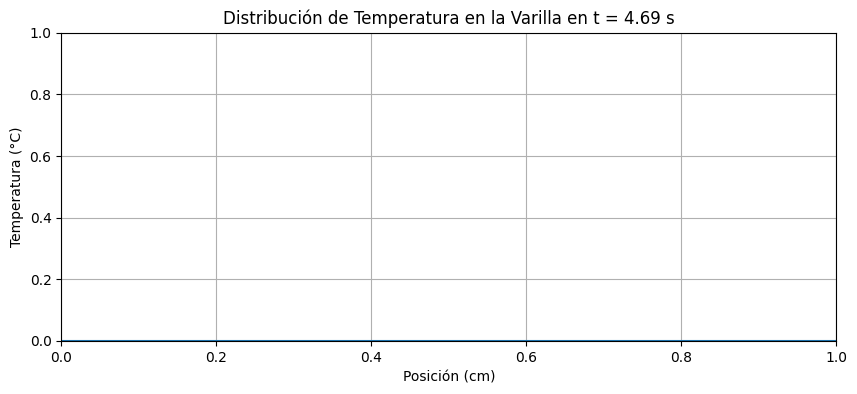

In [111]:
historial = sec_multiescala(T)
list_images = []

for i, t2 in enumerate(historial):
    plt.figure(figsize=(10, 4))
    x = np.linspace(0, L, N)
    plt.plot(x, t2)
    plt.xlabel('Posición (cm)')
    plt.ylabel('Temperatura (°C)')
    plt.title('Distribución de Temperatura en la Varilla en t = {} s'.format(i * dt))
    plt.grid(True)

    name = "eje1_fotos_gif/" + str(i) + ".jpg"

    # Guardar la figura en un archivo
    plt.savefig(name, format="jpg")
    plt.close()
    list_images.append(name)

# Crear el GIF
images = [Image.open(path) for path in list_images]
images[0].save('ejercicio1.gif', save_all=True, append_images=images[1:], loop=0, duration=200)

# Mostrar el GIF
display(IPImage("ejercicio1.gif"))